# Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To visualize the whole grid
pd.options.display.max_columns = 999

# Import dataset 

In [2]:
#Kaggle divides the dataset already into Train and Test data
train = pd.read_csv(r"C:\Users\Mahira\Desktop\daboot\hackathons_python\train.csv")
test = pd.read_csv(r"C:\Users\Mahira\Desktop\daboot\hackathons_python\test.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Exploratory Data Analysis (EDA)

C:\Users\Mahira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase amount Distribution')

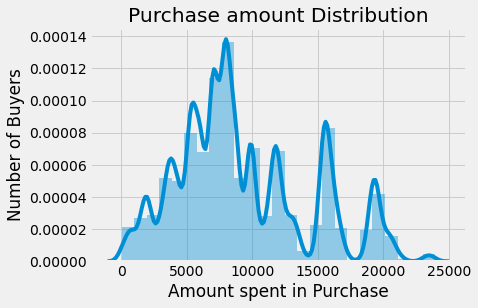

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

In [6]:
print ('Skew is:', train.Purchase.skew())
print('Kurtosis: %f' % train.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


In [7]:
# Let’s start by seeing which of our features are numeric.
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

C:\Users\Mahira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

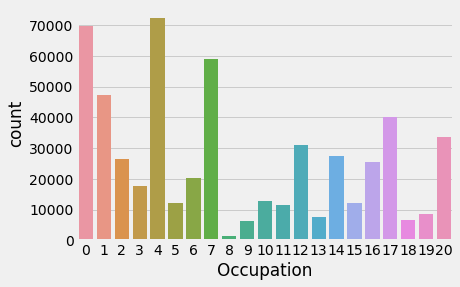

In [8]:
sns.countplot(train.Occupation)

C:\Users\Mahira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

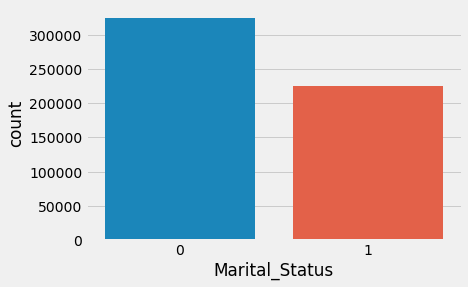

In [9]:
sns.countplot(train.Marital_Status)

In [10]:
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 



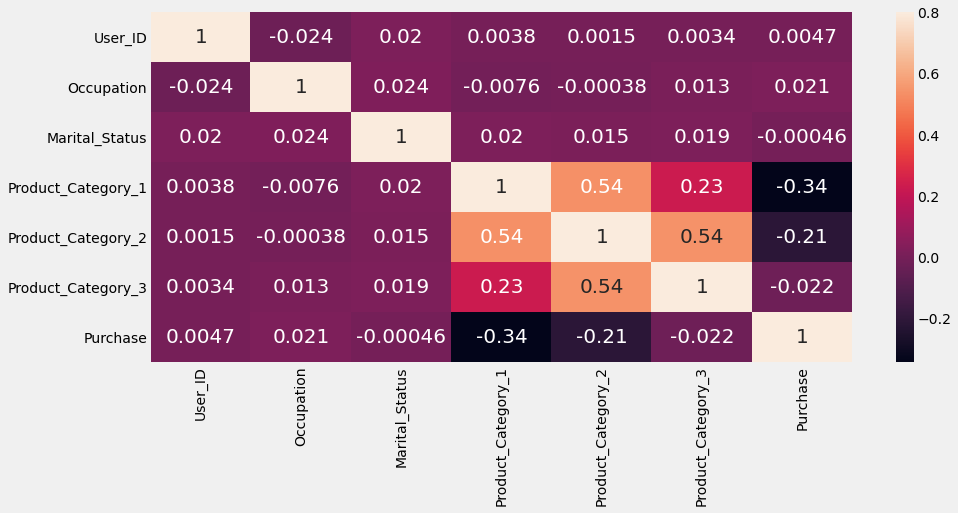

In [11]:
#correlation matrix
f, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

C:\Users\Mahira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

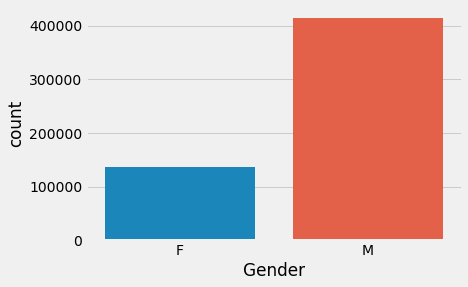

In [12]:
sns.countplot(train.Gender)

C:\Users\Mahira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

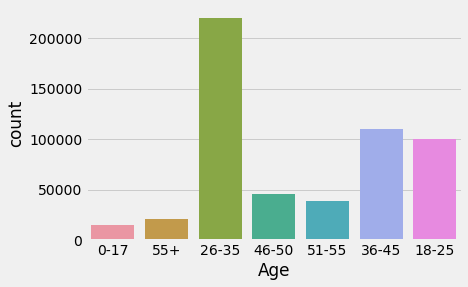

In [13]:
sns.countplot(train.Age)

# Bivariate Analysis

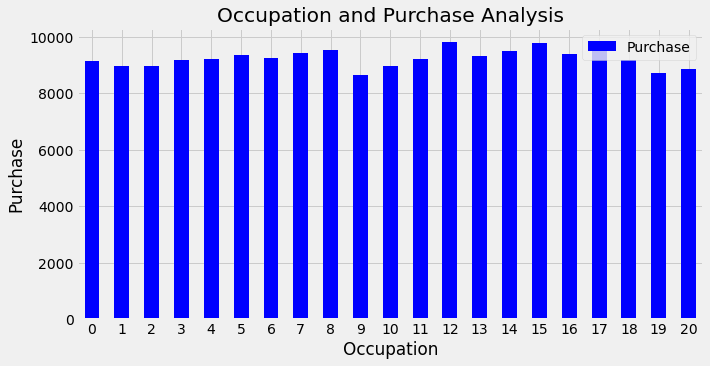

In [14]:
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

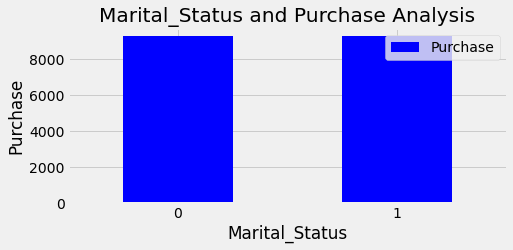

In [15]:
Marital_pivot = \
train.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)
Marital_pivot.plot(kind='bar', color='blue',figsize=(7,3))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [16]:
# Join Train and Test Dataset
train['source']= "train"
test['source']= "test" 
data = pd.concat([train,test], ignore_index = True, sort = False)
print(train.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [17]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [18]:
data["Product_Category_2"]= \
data["Product_Category_2"].fillna(-2.0).astype("float")

In [19]:
data.Product_Category_2.value_counts().sort_index()

-2.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

In [20]:
data["Product_Category_3"]= \
data["Product_Category_3"].fillna(-2.0).astype("float")

In [21]:
data.Product_Category_3.value_counts().sort_index()

-2.0     545809
 3.0        878
 4.0       2691
 5.0      23799
 6.0       6888
 8.0      17861
 9.0      16532
 10.0      2501
 11.0      2585
 12.0     13115
 13.0      7849
 14.0     26283
 15.0     39968
 16.0     46469
 17.0     23818
 18.0      6621
Name: Product_Category_3, dtype: int64

# Categorical variables

In [22]:
#Apply function len(unique()) to every data variable
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
source                            2
dtype: int64

In [23]:
#Filter categorical variables and get dataframe will all strings columns names except Item_identfier and outlet_identifier
category_cols = data.select_dtypes(include=['object']).columns.drop(["source"])
#Print frequency of categories
for col in category_cols:
 #Number of times each value appears in the column
 frequency = data[col].value_counts()
 print("\nThis is the frequency distribution for " + col + ":")
 print(frequency)


This is the frequency distribution for Product_ID:
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00042642       1
P00065542       1
P00268942       1
P00068742       1
P00059342       1
Name: Product_ID, Length: 3677, dtype: int64

This is the frequency distribution for Gender:
M    590031
F    193636
Name: Gender, dtype: int64

This is the frequency distribution for Age:
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

This is the frequency distribution for City_Category:
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

This is the frequency distribution for Stay_In_Current_City_Years:
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64


# Numerical Encoding 

In [24]:
#Turn gender binary
gender_dict = {'F':0, 'M':1}
data["Gender"] = data["Gender"].apply(lambda line: gender_dict[line])

data["Gender"].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

In [25]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data["Age"] = data["Age"].apply(lambda line: age_dict[line])

data["Age"].value_counts()

2    313015
3    156724
1    141953
4     65278
5     54784
6     30579
0     21334
Name: Age, dtype: int64

In [26]:
city_dict = {'A':0, 'B':1, 'C':2}
data["City_Category"] = data["City_Category"].apply(lambda line: city_dict[line])

data["City_Category"].value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

In [27]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
    
#Dummy Variables:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

data.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                        float64
source                           object
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [28]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [29]:
#data["User_ID_Count"]  = getCountVar(data, data, "User_ID")
data["Age_Count"]  =getCountVar(data, data, "Age")
data["Occupation_Count"] =getCountVar(data, data, "Occupation")
data["Product_Category_1_Count"] =getCountVar(data, data,"Product_Category_1")
data["Product_Category_2_Count"] =getCountVar(data, data, "Product_Category_2")
data["Product_Category_3_Count"] =getCountVar(data, data,"Product_Category_3")
data["Product_ID_Count"] =getCountVar(data, data, "Product_ID")

In [30]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
0,1000001,P00069042,0,0,10,0,0,3,-2.0,-2.0,8370.0,train,0,0,1,0,0,21334,18304,28791,245982,545809,344
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200.0,train,0,0,1,0,0,21334,18304,200699,23575,26283,845
2,1000001,P00087842,0,0,10,0,0,12,-2.0,-2.0,1422.0,train,0,0,1,0,0,21334,18304,5610,245982,545809,150
3,1000001,P00085442,0,0,10,0,0,12,14.0,-2.0,1057.0,train,0,0,1,0,0,21334,18304,5610,78834,545809,496
4,1000002,P00285442,1,6,16,2,0,8,-2.0,-2.0,7969.0,train,0,0,0,0,1,30579,36122,162294,245982,545809,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,2,15,1,1,8,-2.0,-2.0,NaN,test,0,0,0,0,1,313015,17356,162294,245982,545809,226
783663,1006036,P00254642,0,2,15,1,1,5,8.0,-2.0,NaN,test,0,0,0,0,1,313015,17356,215950,91317,545809,215
783664,1006036,P00031842,0,2,15,1,1,1,5.0,12.0,NaN,test,0,0,0,0,1,313015,17356,200699,37165,13115,269
783665,1006037,P00124742,0,4,1,2,0,10,16.0,-2.0,NaN,test,0,0,0,0,1,65278,67687,7373,61687,545809,287


In [31]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source' ]=="test"]
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv", index=False)

C:\Users\Mahira\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

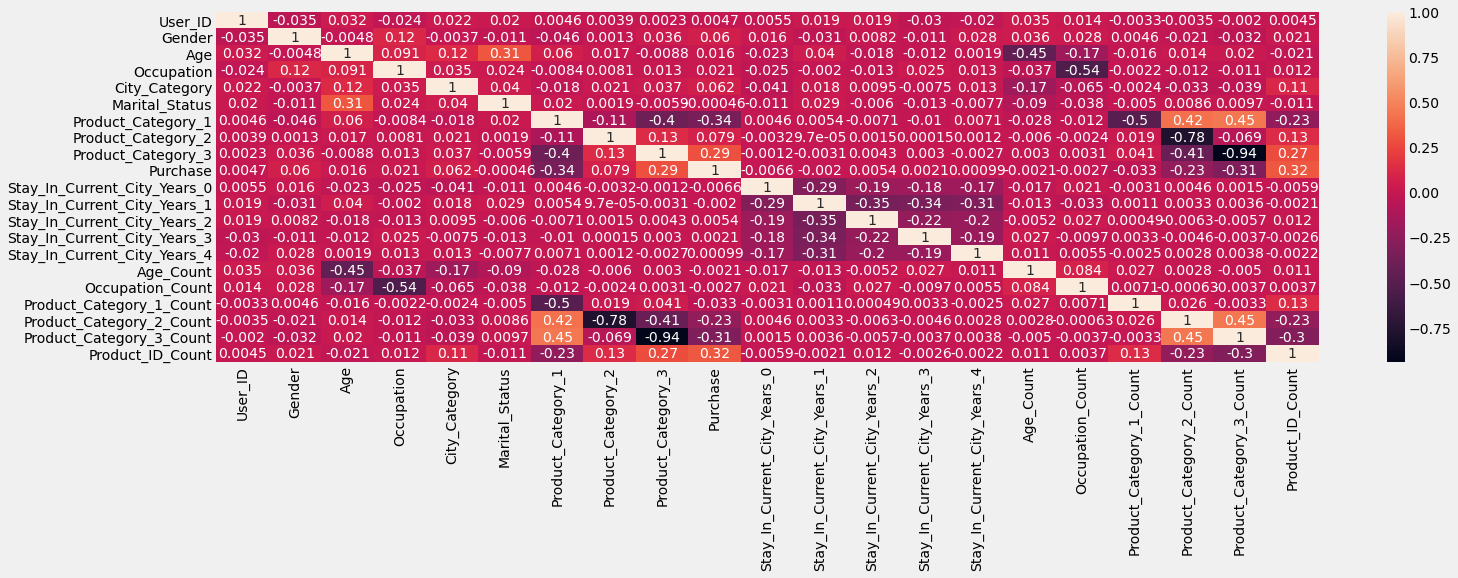

In [43]:
plt.figure(figsize = (22,6))
sns.heatmap(data.corr(), annot =True)

In [44]:
df_corr = data.corr()
df = pd.DataFrame(df_corr['Purchase'])
df

,Purchase
User_ID,0.004716
Gender,0.060346
Age,0.015839
Occupation,0.020833
City_Category,0.061914
Marital_Status,-0.000463
Product_Category_1,-0.343703
Product_Category_2,0.078570
Product_Category_3,0.294086
Purchase,1.000000


# Model Building

In [32]:
train_df = pd.read_csv(r"C:\Users\Mahira\Desktop\daboot\hackathons_python\train_modified.csv")
test_df = pd.read_csv(r"C:\Users\Mahira\Desktop\daboot\hackathons_python\test_modified.csv")

In [34]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']

In [38]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
#Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

# Linear Regression model


Model Report
RMSE : 4342
CV Score : Mean - 4348 | Std - 37.98 | Min - 4288 | Max - 4466


<AxesSubplot:title={'center':'Model Coefficients'}>

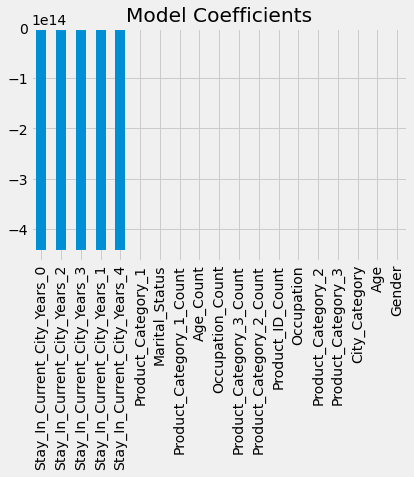

In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

# Decision tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 2671
CV Score : Mean - 2906 | Std - 813.7 | Min - 2673 | Max - 6451


# XGBoost model

In [42]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])
# make predictions
predictions = my_model.predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))
IDcol.append(target)
    submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
    submission.to_csv("XGBoost.csv", index=False)